In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.signal import find_peaks
from scipy.stats import rankdata
from scipy.stats import moment
import pickle
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

In [2]:
def save_to_pickle(data, filename):
    with open(filename, 'wb') as handle:
        pickle.dump(data, handle, protocol=pickle.HIGHEST_PROTOCOL)
    return

def load_from_pickle(filename):
    with open(filename, 'rb') as handle:
        data = pickle.load(handle)
    return data

def make_dataset(filename):
    dataset = load_from_pickle(filename)
    return dataset

### Предсказание marine_traffic_class с помощью RandomForest

In [4]:
dataset.columns

Index(['ais_id', 'num_profile', 'ship_length', 'ship_width', 'view_angle',
       'distance_to_radar', 'marine_traffic_class', 'dimension_class',
       'num_profile_max', 'num_profile_min', 'ranked_values', 'peaks_number',
       'peaks_vals', 'peak2peak', 'peaks_vals_sorted', 'nonzero_count', 'p0p1',
       'p1p2', 'p2p3', 'p3p4', 'p4p5', 'm0', 'm1', 'mass_center', 'mc2', 'mc3',
       'mass_center_rel', 'mc2_n', 'mc3_n', 'num_median', 'num_skew',
       'num_kurtosis'],
      dtype='object')

In [76]:
dataset = make_dataset('dataset.pkl')

features = ['view_angle',
            'peaks_number', 'peak2peak', 'nonzero_count', 
            'p0p1', 'p1p2', 'p2p3', 'p3p4', 'p4p5', 
            'mass_center', 
            'mc2', 'mc3', 
            'mass_center_rel', 
            'mc2_n', 'mc3_n', 
            'num_median', 'num_skew', 'num_kurtosis'
           ]
answers = ['marine_traffic_class']

X = dataset[features]
y = dataset[answers]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify=y)

In [77]:
%%time
clf1 = RandomForestClassifier(n_estimators = 200, max_depth = 15, random_state = 42, warm_start = True)
clf1.fit(X_train, y_train)

c:\users\jul\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Wall time: 4min 45s


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=15, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=True)

In [78]:
y_pred = clf1.predict(X_test)

In [79]:
accuracy_score(y_test, y_pred)

0.6172723216498934

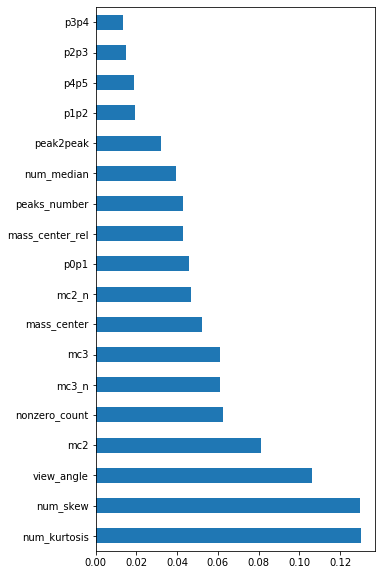

In [80]:
feature_importances = dict(zip(features, clf1.feature_importances_))
pd.Series(feature_importances).nlargest(50).plot(kind='barh', figsize=(5, 10))

In [81]:
print(classification_report(y_test, y_pred))

c:\users\jul\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


                         precision    recall  f1-score   support

                   None       0.67      0.87      0.76     21885
     aggregates_carrier       0.00      0.00      0.00        24
 asphalt/bitumen_tanker       0.75      0.24      0.36       206
           bulk_carrier       0.63      0.15      0.24       478
        chemical_tanker       0.00      0.00      0.00       428
              container       0.00      0.00      0.00        61
         container_ship       0.59      0.59      0.59      7548
       crude_oil tanker       0.66      0.79      0.72     12098
              dry_cargo       0.89      0.47      0.61       178
                fishing       0.62      0.01      0.01       666
         fishing_vessel       0.00      0.00      0.00        24
          general_cargo       0.63      0.29      0.40      3613
       high_speed craft       0.00      0.00      0.00        57
         hopper_dredger       0.55      0.41      0.47      2820
               lh896354 

In [82]:
save_to_pickle(model,'rf_model_mtc.pkl')

### Предсказание dimension_class 

In [83]:
dataset = make_dataset('dataset.pkl')

features = ['view_angle',
            'peaks_number', 'peak2peak', 'nonzero_count', 
            'p0p1', 'p1p2', 'p2p3', 'p3p4', 'p4p5', 
            #'m0', 'm1', 
            'mass_center', 
            'mc2', 'mc3', 
            'mass_center_rel', 
            'mc2_n', 'mc3_n', 
            'num_median', 'num_skew', 'num_kurtosis'
           ]

answers = ['dimension_class']

X = dataset[features]
y = dataset[answers]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify=y)

In [84]:
%%time
clf1 = RandomForestClassifier(n_estimators = 100, max_depth = 15, random_state = 42, warm_start = True)
clf1.fit(X_train, y_train)

c:\users\jul\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Wall time: 2h 57min 37s


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=15, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=True)

In [85]:
y_pred = clf1.predict(X_test)

In [86]:
accuracy_score(y_test, y_pred)

0.7786549997521194

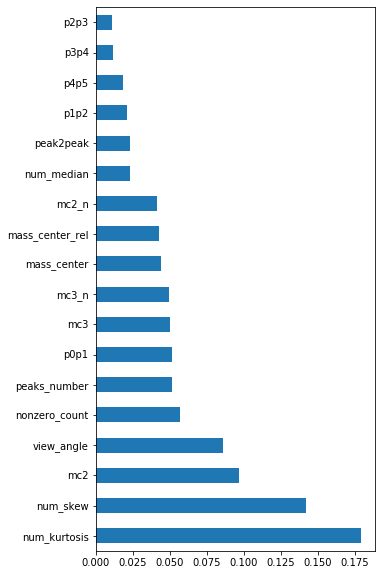

In [87]:
feature_importances = dict(zip(features, clf1.feature_importances_))
pd.Series(feature_importances).nlargest(50).plot(kind='barh', figsize=(5, 10))

In [88]:
save_to_pickle(model,'rf_model_dc.pkl')

In [37]:
dataset.columns

Index(['ais_id', 'num_profile', 'ship_length', 'ship_width', 'view_angle',
       'distance_to_radar', 'marine_traffic_class', 'dimension_class',
       'num_profile_max', 'num_profile_min', 'ranked_values', 'peaks_number',
       'peaks_vals', 'peak2peak', 'peaks_vals_sorted', 'nonzero_count', 'p0p1',
       'p1p2', 'p2p3', 'p3p4', 'p4p5', 'm0', 'm1', 'mass_center', 'mc2', 'mc3',
       'mass_center_rel', 'mc2_n', 'mc3_n', 'num_median', 'num_skew',
       'num_kurtosis'],
      dtype='object')

### Предсказание marine_traffic_class. Нейросетевой подход 

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import BatchNormalization, LSTM, Dense, Flatten

In [45]:
dataset = make_dataset('dataset_scaled.pkl')

features = ['view_angle',
            'peaks_number', 'peak2peak', 'nonzero_count', 
            'p0p1', 'p1p2', 'p2p3', 'p3p4', 'p4p5', 
            'mass_center', 
            'mc2', 'mc3', 
            'mass_center_rel', 
            'mc2_n', 'mc3_n', 
            'num_median', 'num_skew', 'num_kurtosis'
           ]
answers = ['marine_traffic_class']
X = np.array(dataset['num_profile'].to_list())
X = np.hstack((X, np.array(dataset[features])))
y = np.array(dataset[answers])

N_TIME_STEPS = X.shape[1]
N_FEATURES = 1

y = np.array(pd.get_dummies(y.reshape(y.shape[0])))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify=y)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [46]:
y.shape

(403418, 33)

In [47]:
X.shape

(403418, 218)

In [48]:
model = Sequential()
model.add(Dense(N_TIME_STEPS, input_dim = N_TIME_STEPS, activation='tanh'))
model.add(BatchNormalization())
model.add(Dense(N_TIME_STEPS*2, activation='relu', kernel_initializer = keras.initializers.he_normal(), kernel_regularizer = keras.regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(Dense(33, activation='softmax'))

model.compile(optimizer = keras.optimizers.Adam(), loss = keras.losses.categorical_crossentropy, 
              metrics = ['accuracy'])

model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 218)               47742     
_________________________________________________________________
batch_normalization_13 (Batc (None, 218)               872       
_________________________________________________________________
dense_18 (Dense)             (None, 436)               95484     
_________________________________________________________________
batch_normalization_14 (Batc (None, 436)               1744      
_________________________________________________________________
dense_19 (Dense)             (None, 33)                14421     
Total params: 160,263
Trainable params: 158,955
Non-trainable params: 1,308
_________________________________________________________________


In [49]:
X_train.shape

(322734, 218)

In [50]:
history = model.fit(X_train, y_train, batch_size = 128, epochs = 50, validation_data = [X_test, y_test])

Train on 322734 samples, validate on 80684 samples
Epoch 1/50
322734/322734 [==============================] - 14s 44us/step - loss: 1.8937 - accuracy: 0.6208 - val_loss: 1.3373 - val_accuracy: 0.6508
Epoch 2/50
322734/322734 [==============================] - 14s 43us/step - loss: 1.2742 - accuracy: 0.6684 - val_loss: 1.2572 - val_accuracy: 0.6765
Epoch 3/50
322734/322734 [==============================] - 14s 42us/step - loss: 1.2020 - accuracy: 0.6863 - val_loss: 1.1680 - val_accuracy: 0.6953
Epoch 4/50
322734/322734 [==============================] - 13s 42us/step - loss: 1.1470 - accuracy: 0.6975 - val_loss: 1.1388 - val_accuracy: 0.6971
Epoch 5/50
322734/322734 [==============================] - 13s 42us/step - loss: 1.1119 - accuracy: 0.7040 - val_loss: 1.1257 - val_accuracy: 0.7006
Epoch 6/50
322734/322734 [==============================] - 13s 42us/step - loss: 1.0855 - accuracy: 0.7097 - val_loss: 1.0964 - val_accuracy: 0.7069
Epoch 7/50
322734/322734 [=======================

In [51]:
y_pred = model.predict_classes(X_test)

In [52]:
from sklearn.metrics import accuracy_score, confusion_matrix
print('Общая доля правильных ответов на тестовом датасете: {:.3f}'.format(accuracy_score(y_test.argmax(axis = 1), y_pred)))

Общая доля правильных ответов на тестовом датасете: 0.722


In [53]:
from sklearn.metrics import classification_report
print(classification_report(y_test.argmax(axis = 1), y_pred))

              precision    recall  f1-score   support

           0       0.72      0.87      0.79     21885
           1       0.00      0.00      0.00        24
           2       0.86      0.77      0.81       206
           3       0.85      0.48      0.61       478
           4       0.59      0.14      0.22       428
           5       0.24      0.13      0.17        61
           6       0.70      0.73      0.72      7548
           7       0.89      0.85      0.87     12098
           8       0.88      0.59      0.70       178
           9       0.56      0.17      0.26       666
          10       0.33      0.08      0.13        24
          11       0.66      0.59      0.62      3613
          12       0.00      0.00      0.00        57
          13       0.52      0.51      0.52      2820
          14       0.25      0.01      0.01       151
          15       0.56      0.23      0.33      1159
          16       0.70      0.77      0.73     10108
          17       0.83    

c:\users\jul\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [54]:
save_to_pickle(model,'nn_model2.pkl')